In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline

In [5]:
#use your dataset location
data = pd.read_csv(r'C:\Users\Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# removing Id column - data cleansing
data = data.drop('Id', axis=1) 

In [7]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
144            6.7           3.3            5.7           2.5
43             5.0           3.5            1.6           0.6
132            6.4           2.8            5.6           2.2
5              5.4           3.9            1.7           0.4
61             5.9           3.0            4.2           1.5
31        Iris-setosa
139    Iris-virginica
21        Iris-setosa
41        Iris-setosa
113    Iris-virginica
Name: Species, dtype: object


In [11]:
# see how many samples we have of each species 
data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

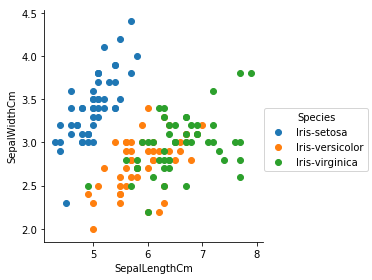

In [26]:
# use seaborn to make scatter plot showing species for each sample
import seaborn as sns
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

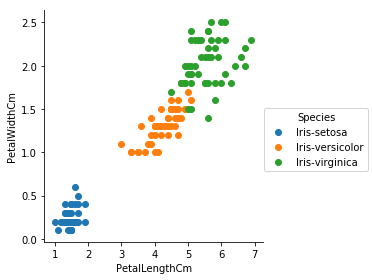

In [15]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

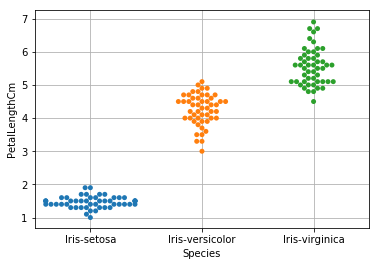

In [16]:
# swarm plot for petal lenght for the species (one dimension of data) - 
sns.swarmplot(x="Species", y="PetalLengthCm", data=data)
plt.grid()

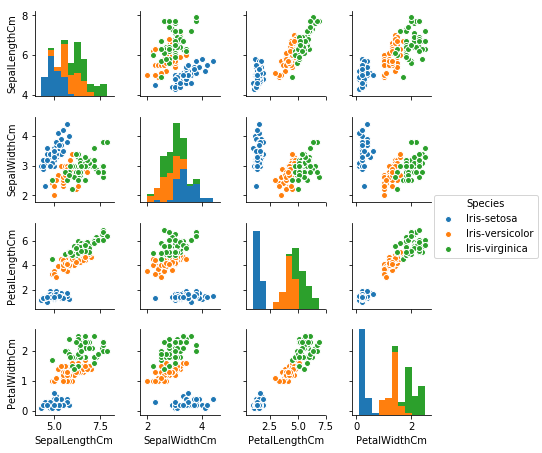

In [19]:
#scatter matrix
sns.pairplot(data, hue="Species", diag_kind="hist", size=1.6);

In [20]:
# Feature Scaling: 
# Feature scaling is required as the data is unbalanced (eg sepallength ~4x petalwidth),
# it will not let larger features  dominate the others in clustering.

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,1.038005,-0.124958,0.819624,1.447956
10,-0.537178,1.494863,-1.284407,-1.312977
35,-1.021849,0.337848,-1.455004,-1.312977
63,0.310998,-0.356361,0.535296,0.264699
93,-1.021849,-1.744778,-0.260824,-0.261193


In [35]:
data.Species = pd.Categorical(data.Species)
data['Species_code'] = data.Species.cat.codes

In [36]:
data.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_code'],
      dtype='object')

In [39]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species_code']
filtered_data = data[columns]
filtered_data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_code
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


0
1
2
3
4
5
6
7
8


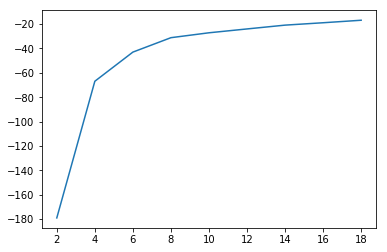

In [40]:
def optimal_clusters(df):
    Nc = range(2, 20, 2)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(filtered_data)
pl.plot(Nc,score)

In [69]:
# def do_kmeans(X, num_cluster):
#     model = KMeans(n_clusters=num_cluster)
#     model.fit(X)
#     return model
#     kmeans_model = do_kmeans(filtered_data, 4)
kmeans_model= KMeans(n_clusters=3)
kmeans_model.fit(filtered_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
data_label = kmeans_model.predict(filtered_data)
collections.Counter(data_label)

Counter({0: 50, 1: 51, 2: 49})

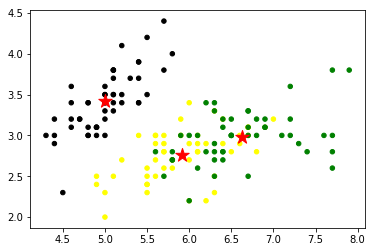

In [71]:
color_map=['black', 'red', 'yellow', 'green']
plt.scatter(filtered_data.iloc[:, 0], filtered_data.iloc[:, 1], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],s=200,marker='*',c='red',label='centroids')
plt.show()

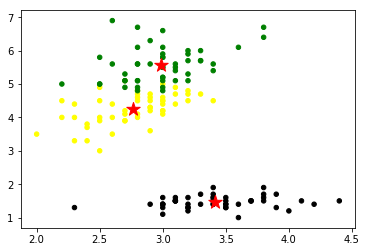

In [72]:
color_map=['black', 'red', 'yellow', 'green']
plt.scatter(filtered_data.iloc[:, 1], filtered_data.iloc[:, 2], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,2],s=200,marker='*',c='red',label='centroids')
plt.show()

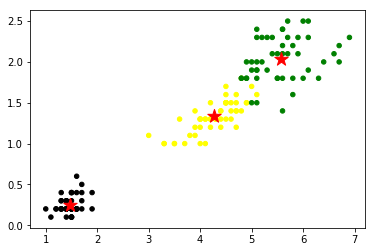

In [73]:
color_map=['black', 'red', 'yellow', 'green']
plt.scatter(filtered_data.iloc[:, 2], filtered_data.iloc[:, 3], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,2],kmeans_model.cluster_centers_[:,3],s=200,marker='*',c='red',label='centroids')
plt.show()

In [79]:
#Silhouette score to determine number of possible clusters

from sklearn import metrics
score = metrics.silhouette_score(X_scaled, data_label )
score

0.38704751018614814

C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


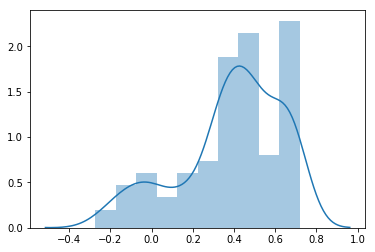

In [81]:
scores = metrics.silhouette_samples(X_scaled, data_label)
sns.distplot(scores);

In [84]:
#Gaussian Mixture Model (GMM) Clustering

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(X_scaled)

# predict the cluster for each data point
data_model_gmm = gmm.predict(X_scaled)
data_model_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [86]:
from matplotlib.patches import Ellipse
import numpy as np
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
        
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [91]:
from  sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,covariance_type='full',verbose=1,verbose_interval=10,max_iter=5000).fit(filtered_data.values)
labels = gmm.predict(filtered_data.values)
labels

Initialization 0
  Iteration 0
Initialization converged: True


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [93]:
test_features= ['PetalLengthCm','PetalWidthCm']
X = data[test_features].values
X [:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

Initialization 0
  Iteration 0
Initialization converged: True


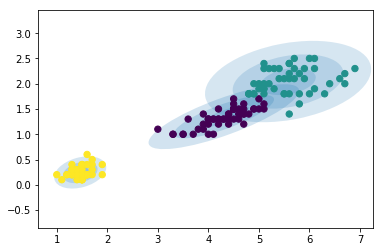

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');
plot_gmm(gmm,X)

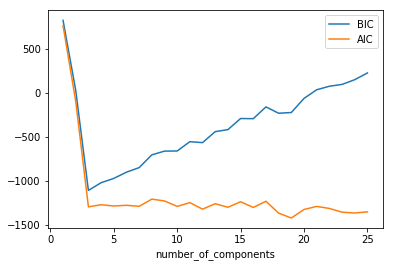

In [101]:
#BIC and AIC 

gmm_models  = [GaussianMixture(n_components=i,covariance_type='full',max_iter=500).fit(filtered_data.values) for i in range(1,26)] 

n_components = [i for i in range(1,26)]
plt.plot(n_components, [m.bic(filtered_data.values) for m in gmm_models], label='BIC')
plt.plot(n_components, [m.aic(filtered_data.values) for m in gmm_models], label='AIC')
plt.legend(loc='best')
plt.xlabel('number_of_components');

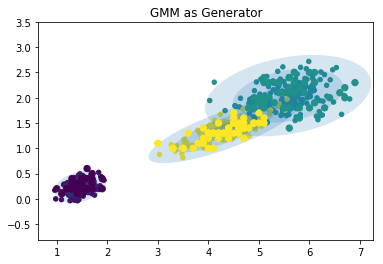

In [124]:
# Density Estimation
#density estimation using GMM as generator

gmm = GaussianMixture(n_components=3,covariance_type='full', random_state=0)
model = gmm.fit(filtered_data.values)
(genX, genY) = model.sample(500)
plt.scatter(genX[:,2], genX[:,3],c=genY,s=20,cmap='viridis')
test_features= ['PetalLengthCm','PetalWidthCm']
X = filtered_data[test_features].values
plot_gmm(gmm,X)
plt.title("GMM as Generator")
genX = genX[:,[2,3]]

In [123]:
#Comparison Kmeans Vs GMM

from sklearn.metrics.cluster import adjusted_rand_score

# let's see how the k-means clustering did - 
score = adjusted_rand_score(y, data_label)
score

0.97993200471804

In [119]:
# now the GMM clustering did - 
score = adjusted_rand_score(y, data_model_gmm)
score

0.9038742317748124

In [ ]:
# k-Means Clustering is biased towards spherical distributions of clusters, and makes hard assignments to clusters, 
# but is very fast (linear in number of features and data points).

# Gaussian Mixture Model (GMM) Clustering handles ellipsoidal distributions, and makes 'soft' assignments to clusters, 
# but is much slower than k-means for large datasets.

# For this dataset, which was measuring what were probably normally distributed features, 
# the GMM clustering worked better at finding the actual species labels, as measured by the adjusted Rand score.

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


Text(0,0.5,'PetalLengthCm')

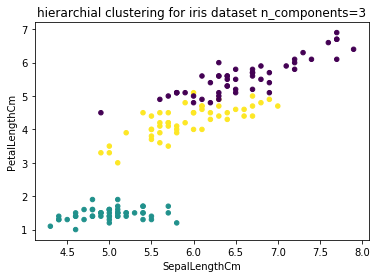

In [129]:
# Hierarchial Clustering using AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
from sklearn.neighbors import kneighbors_graph
KeepXNearestPointsConnected = kneighbors_graph(filtered_data.values, n_neighbors=3, include_self=False)
HC = AgglomerativeClustering(n_clusters=3, linkage='ward', connectivity=KeepXNearestPointsConnected)
HC.fit(filtered_data.values)
test_features= ['SepalLengthCm','PetalLengthCm']
X = filtered_data[test_features].values
plt.scatter(X[:, 0], X[:, 1], c=HC.labels_, s=20, cmap='viridis');
plt.title("hierarchial clustering for iris dataset n_components=3")
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
#plot_hierarchial_clustering(ward,X)

In [130]:
#Evaluation of Hirarchial clustering

from sklearn import metrics
from sklearn.metrics import pairwise_distances
X = filtered_data.values
labels = HC.labels_
metrics.calinski_harabaz_score(X, labels)

568.5477453046757

In [135]:
#Silhouette score for Hirarachial clustering

from sklearn.metrics import silhouette_score
KeepXNearestPointsConnected = kneighbors_graph(filtered_data.values, n_neighbors=10, include_self=False)
HC = AgglomerativeClustering(n_clusters=3, linkage='ward', connectivity=KeepXNearestPointsConnected)
HC.fit(filtered_data.values)
HC_silhoute_score = silhouette_score(filtered_data, HC.labels_, metric='euclidean')
HC_silhoute_score

C:\Users\PB\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


0.5780114722111267